# Marketing Campaign Dataset - EDA

## Abstract

In this notebook, the marketing campaign dataset is analysed. The objective is to **get to know the data** and **develop strategies to deal with the tasks involved in preprocessing** the data, such as feature selection, outlier and missing data treatment, etc. Here, the data is not transformed, but simply visualized and analyzed.

## Table of Contents
* [Overview](#chapter0)
* [1. Basic inspection](#chapter1)
* [2. Missing data analysis](#chapter2)
* [3. Outlier detection](#chapter3)
* [4. Univariate analysis](#chapter4)
* [5. Correlation between variables](#chapter5)

## Overview <a class="anchor" id="chapter0"></a>

**Short description:** Data from a marketing campaign. The observations are individual customers. For each customer we have personal information as well as purchasing patterns (amount spent on certain product types), and whether the customer accepted the offer in various campaings. The customers of the dataset are already enroled with the company. From the description of the variables, it can be seen that the company has a webpage, a catalog and on-site stores. The dataset consists of 29 variables and 2240 observations, and weights about 300KB.

**Source:** Kaggle: https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign/

**Goal:** Predict who will respond to an offer for a product or service. This can be interpreted as getting to know the customer profile.

**Description of the variables (29):**
- `ID`: Customer ID.
- `Year_Birth`: Custome's year of birth.
- `Education`: Customer's level of education.
- `Marital_Status`: Customer's marital status.
- `Income`: Customer's yearly household income.
- `Kidhome`: Number of *small* children in customer's household.
- `Teenhome`: Number of *teenagers* in customer's household.
- `Dt_Customer`: Date of customer's enrolment with the company.
- `Recency`: Number of days since the last purchase.
- `MntFruits`: Amount spent in fruits products in the last 2 years.
- `MntMeatProducts`: Amount spent in meat products in the last 2 years.
- `MntFishProducts`: Amount spent in fish products in the last 2 years.
- `MntSweetProducts`: Amount spent in sweet products in the last 2 years.
- `MntGoldProds`: Amount spent in gold products in the last 2 years.
- `NumDealsPurchases`: Number of purchases made with discount.
- `NumWebPurchases`: Number of purchases made through the company's web site.
- `NumCatalogPurchases`: Number of purchases made using the catalogue.
- `NumStorePurchases`: Number of purchases made directly in stores.
- `NumWebVisitsMonth`: Number of visits to the company's web site in the last month
- `AcceptedCmp3`: If customer accepted the offer in the 3rd campaign (1 for yes, 0 for otherwise)
- `AcceptedCmp4`: If customer accepted the offer in the 4th campaign (1 for yes, 0 for otherwise)
- `AcceptedCmp5`: If customer accepted the offer in the 5th campaign (1 for yes, 0 for otherwise)
- `AcceptedCmp1`: If customer accepted the offer in the 1st campaign (1 for yes, 0 for otherwise)
- `AcceptedCmp2`: If customer accepted the offer in the 2nd campaign (1 for yes, 0 for otherwise)
- `Complain`: If the customer complained in the last 2 years (1 for yes)
- `Z_CostContact`: Cost to contact a customer
- `Z_Revenue`: Revenue after client accepting campaign
- `Response`: If the customer accepted the offer in the last campaign (1 for yes, 0 for otherwise)

### Library imports

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Missing data
import missingno as msno

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Reading data

In [2]:
data_path = "../Dataset/marketing_campaign.csv"
data = pd.read_csv(data_path, sep=";")

## 1. Basic inspection <a class="anchor" id="chapter1"></a>

In [3]:
# Dimensions of the data
data.shape

(2240, 29)

In [4]:
# Visualization of some columns
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
# Null count and data type of each variable
data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [6]:
data.dtypes.value_counts()

int64      25
object      3
float64     1
Name: count, dtype: int64

**<span style="color:blue">Insight</span>**:
Most variables are numerical variables.

In [7]:
# Basic statistics for each variable
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


## 2. Missing data analysis <a class="anchor" id="chapter2"></a>

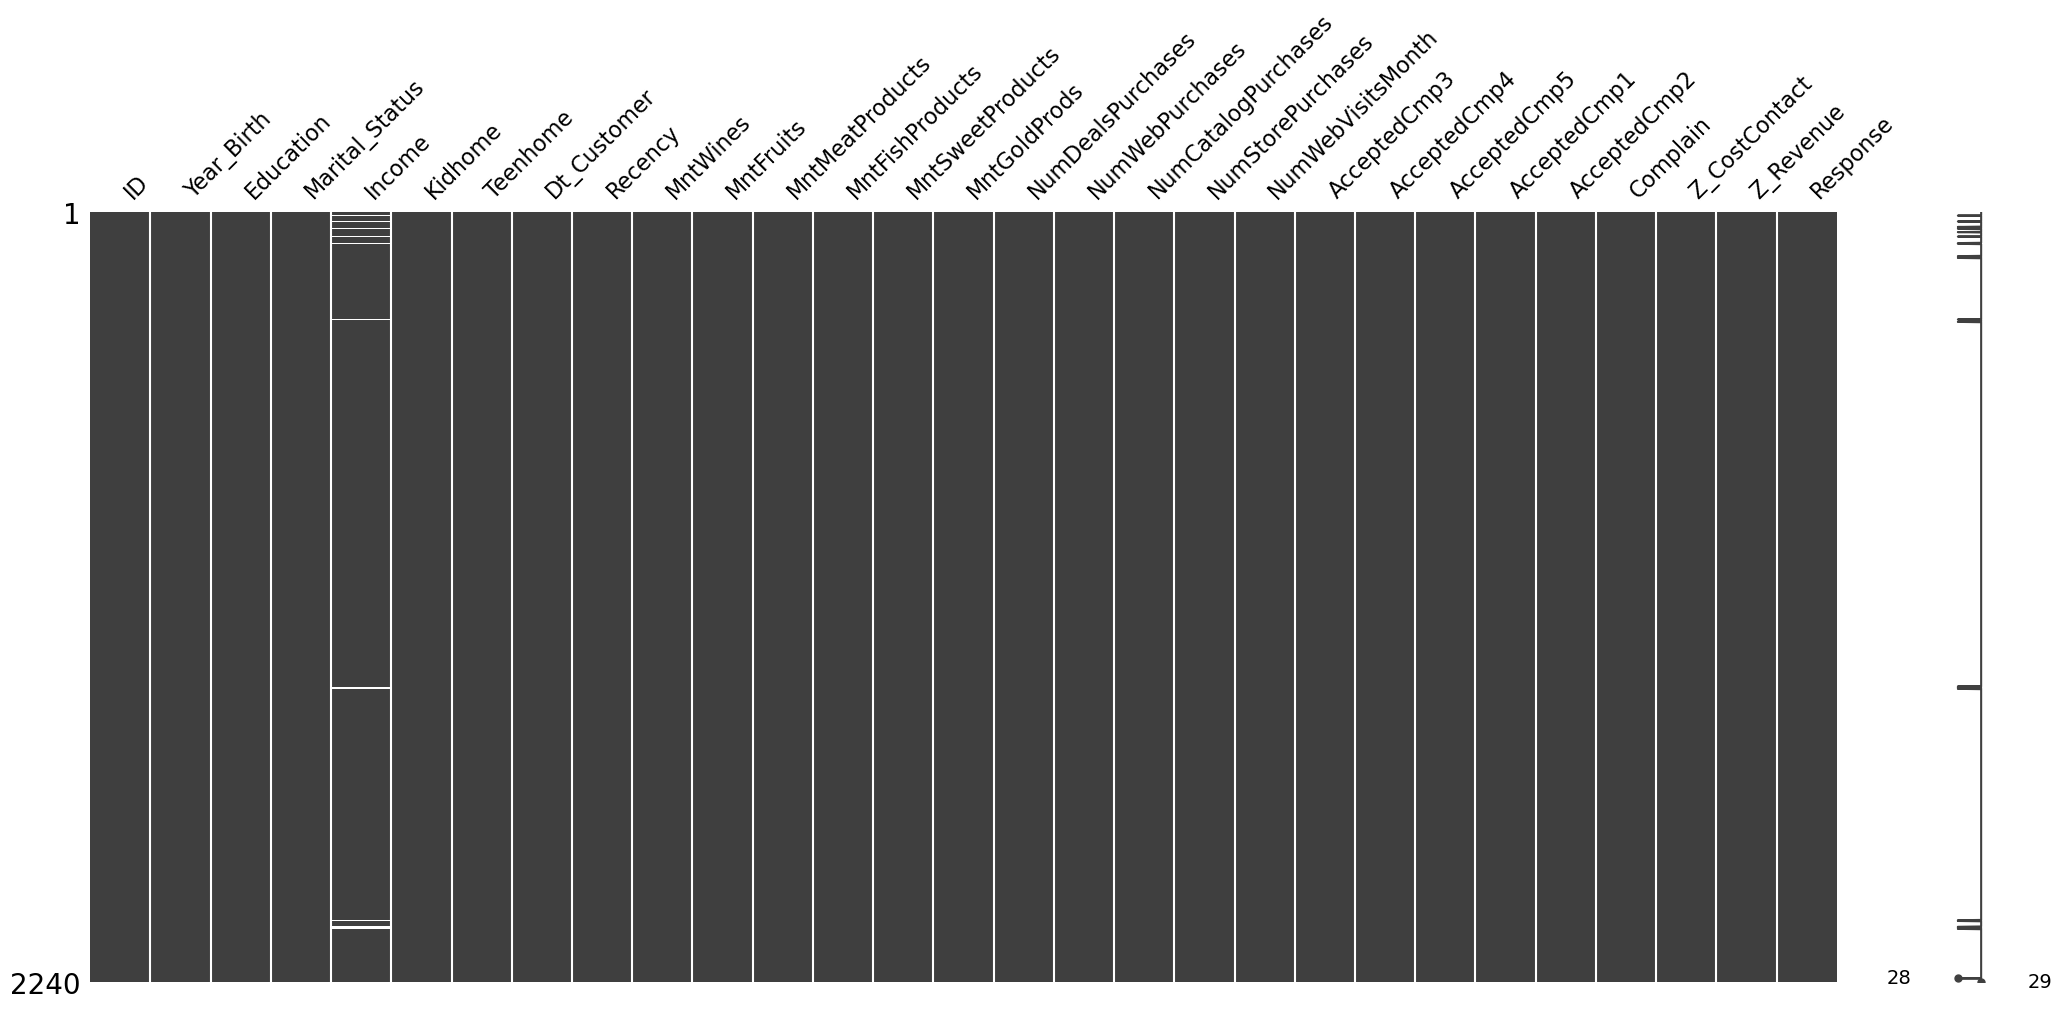

In [8]:
# Visualization of missing data
missing_pattern = msno.matrix(data)

In [9]:
# Missing data information in detail. Sorted by number of missing values
missing_count = data.isnull().sum()
missing_percentage = (data.isnull().mean()) * 100

missing_info = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percentage': missing_percentage
}).sort_values(by='Missing Count', ascending=False)

missing_info.head()

,Missing Count,Missing Percentage
Income,24,1.071429
ID,0,0.000000
NumDealsPurchases,0,0.000000
Z_Revenue,0,0.000000
Z_CostContact,0,0.000000


**<span style="color:blue">Insight</span>**:
Only `Income` has missing values. Only 24 values are missing in this column (1.07%)

## 3. Outlier detection <a class="anchor" id="chapter3"></a>

To identify possible outliers, the method IQR will be used. This method, for a given column (variable), calculates de difference between the first and third quantile, and considers a data point to be an outlier if it's beyond 1.5 times this difference from the first or third quantile. The outliers detected this way wil be further analysed to determiner whether they are true outliers or not.

In [10]:
# Calculate outliers of a column using IQR
def calculate_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((column < (Q1 - 1.5 * IQR)) | (column > (Q3 + 1.5 * IQR)))
    return outliers.sum()

# Keep only the numerical columns
data_numerical = data.select_dtypes(include='number')

# Create a DataFrame with max, min, and number of outliers for each column
outliers_info = pd.DataFrame({
    'Min': data_numerical.apply(lambda column: column.min()),
    'Max': data_numerical.apply(lambda column: column.max()),
    'Outliers-IQR': data_numerical.apply(calculate_outliers)
}).sort_values(by='Outliers-IQR', ascending=False)
outliers_info

,Min,Max,Outliers-IQR
Response,0.0,1.0,334
MntSweetProducts,0.0,263.0,248
MntFruits,0.0,199.0,227
MntFishProducts,0.0,259.0,223
MntGoldProds,0.0,362.0,207
MntMeatProducts,0.0,1725.0,175
AcceptedCmp4,0.0,1.0,167
AcceptedCmp3,0.0,1.0,163
AcceptedCmp5,0.0,1.0,163
AcceptedCmp1,0.0,1.0,144


This method identifies outliers in many variables. However, it does not make sense to consider them in variables that are binary, such as the `Response` and the results for different campaigns. Also, for some variables, simply by looking at the maximum and minimum values, and by understanding what the variable means, we can already tell that these outliers do not really reflect extreme values but rather a long tailed distribution. The distributions for all variables will be shown later so these considerations can be double-checked.

However, there are some variables for which there do seem to be some outliers. These will be inspected in more detail with the use of scatterplots. For this purpose, a special function is developed next.

In [11]:
def calculate_and_visualize_outliers(column):
    # Calculate statistics
    mean = column.mean()
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((column < (Q1 - 1.5 * IQR)) | (column > (Q3 + 1.5 * IQR)))

    # Create plot
    plt.figure(figsize=(5, 3.5))
    plt.scatter(column.index[~outliers], column[~outliers], c="blue", alpha=0.4)
    plt.scatter(column.index[outliers], column[outliers], c="orange", alpha=0.4, label='Outliers')
    
    # Add statistics
    plt.axhline(y=Q1 - 1.5 * IQR, color='r', linestyle='--', label='Q1-1.5IQR')
    plt.axhline(y=Q3 + 1.5 * IQR, color='r', linestyle='--', label='Q3+1.5IQR')
    plt.axhline(y=Q1, color='k', linestyle=':', label='Q1')
    plt.axhline(y=Q3, color='k', linestyle=':', label='Q3')
    plt.axhline(y=mean, color='k', label="Mean")
    
    # Configure plot
    plt.title(f'Scatterplot for {column.name}')
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

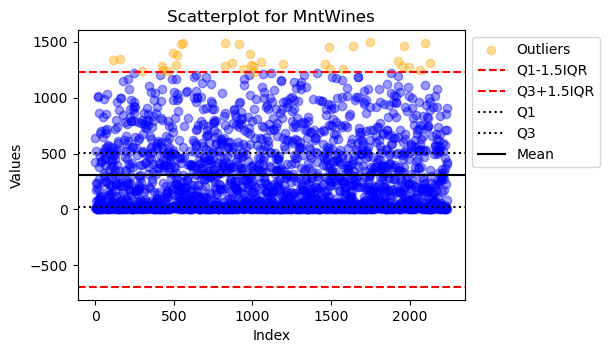

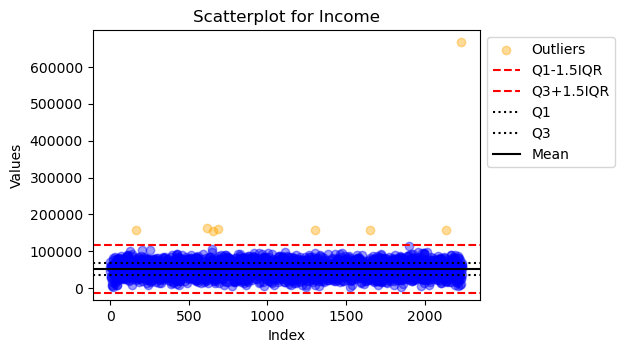

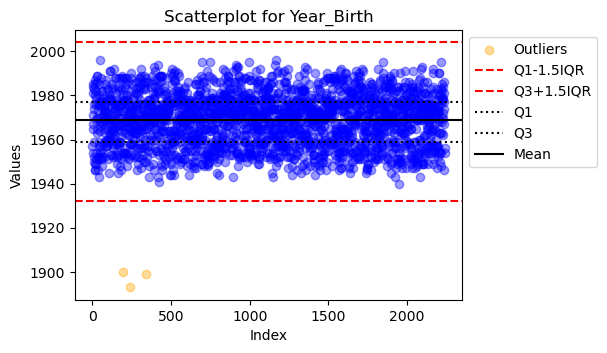

In [12]:
selected_variables = ["MntWines", "Income", "Year_Birth"]
for variable in selected_variables:
    calculate_and_visualize_outliers(data[variable])

From the previous plots, it can be seen that while `MntWines` simply presents a long tailed distribution, `Income` and `Year_Birth` do seem to contain real outliers.

**<span style="color:blue">Insight</span>**: The variables `Income` and `Year_Birth` contain outliers.

## 4. Univariate analysis <a class="anchor" id="chapter4"></a>

First, the variables are separated depending on their nature.

In [13]:
barplot_variables = ['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'AcceptedCmp3',
                     'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
                     'Complain', 'Response']

histogram_variables = ['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits',
                       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
                       'Z_CostContact', 'Z_Revenue', 'Dt_Customer']

data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

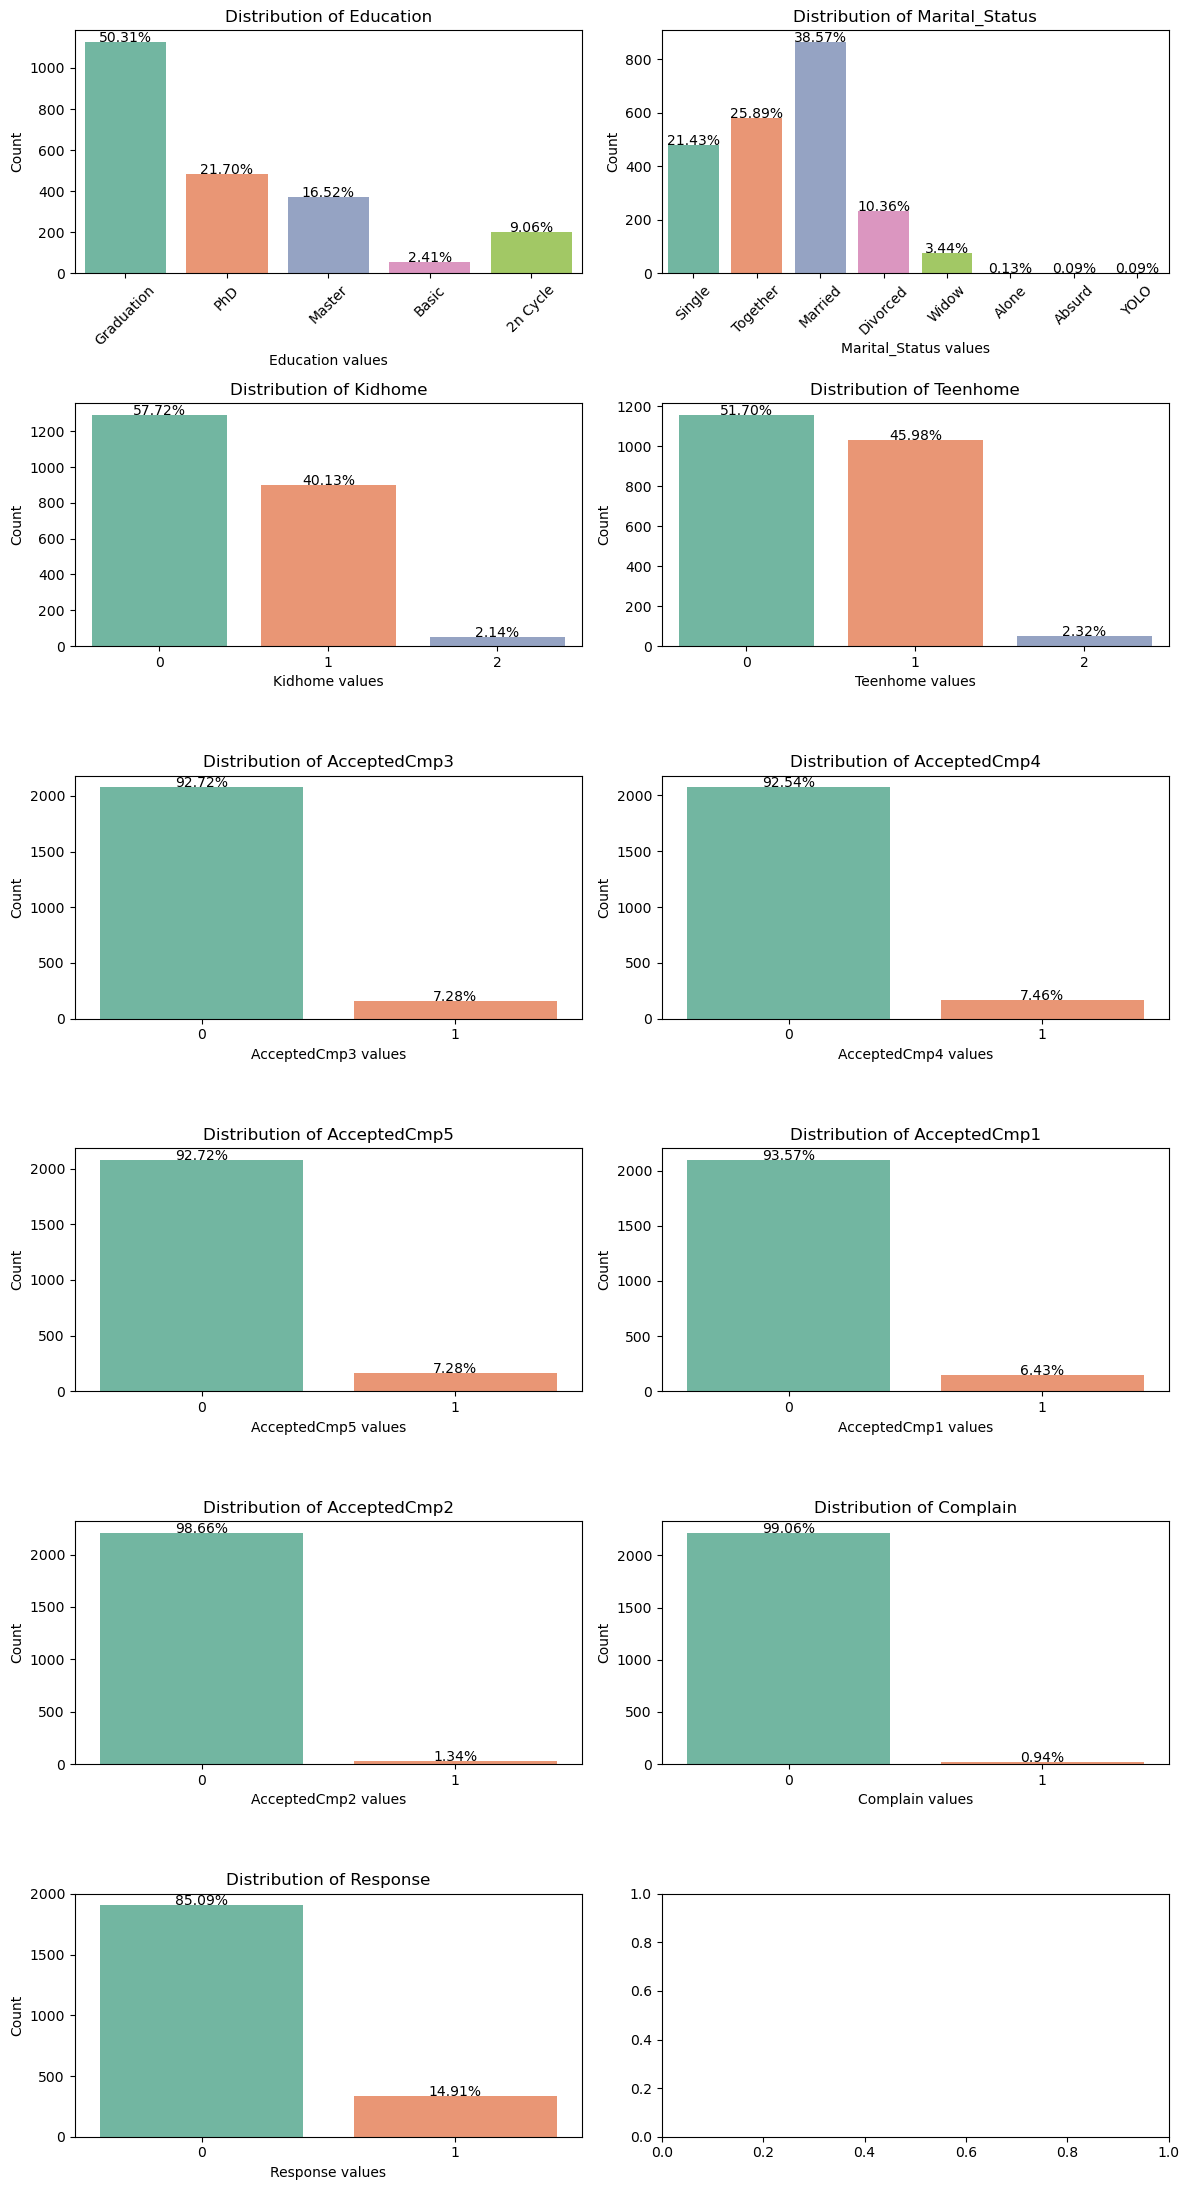

In [14]:
# Barplots
fig, axs = plt.subplots(6, 2, figsize=(12, 22))
axs = axs.flatten()

for i, variable in enumerate(barplot_variables):
    sns.countplot(x=variable, data=data, ax=axs[i], palette='Set2')
    axs[i].set_xlabel(f'{variable} values')
    axs[i].set_ylabel('Count')
    axs[i].set_title(f'Distribution of {variable}')
    if variable == 'Education' or variable == 'Marital_Status':
        axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)
    
    total = float(len(data[variable]))
    for p in axs[i].patches:
        height = p.get_height()
        axs[i].text(p.get_x() + p.get_width() / 2., height + 0.1,
                    f'{(height/total)*100:.2f}%', ha='center')

plt.tight_layout()
plt.show()

**<span style="color:blue">Insights</span>**: Some class imbalance problems.
- The variable `Marital_Status` has 3 severely underrepresented classes (<0.2%). Two of these classes ('Absurd' and 'YOLO') are strange.
- Campaigns 1 through 5 have class imbalance. The offer is accepted in about 7% of cases for these campaigns. Campaign 2 is particularly affected.
- The `Complain` variable has a strong clas imbalance (0.94% for one class).
- The response variable is moderately imblanaced (15% class 1).

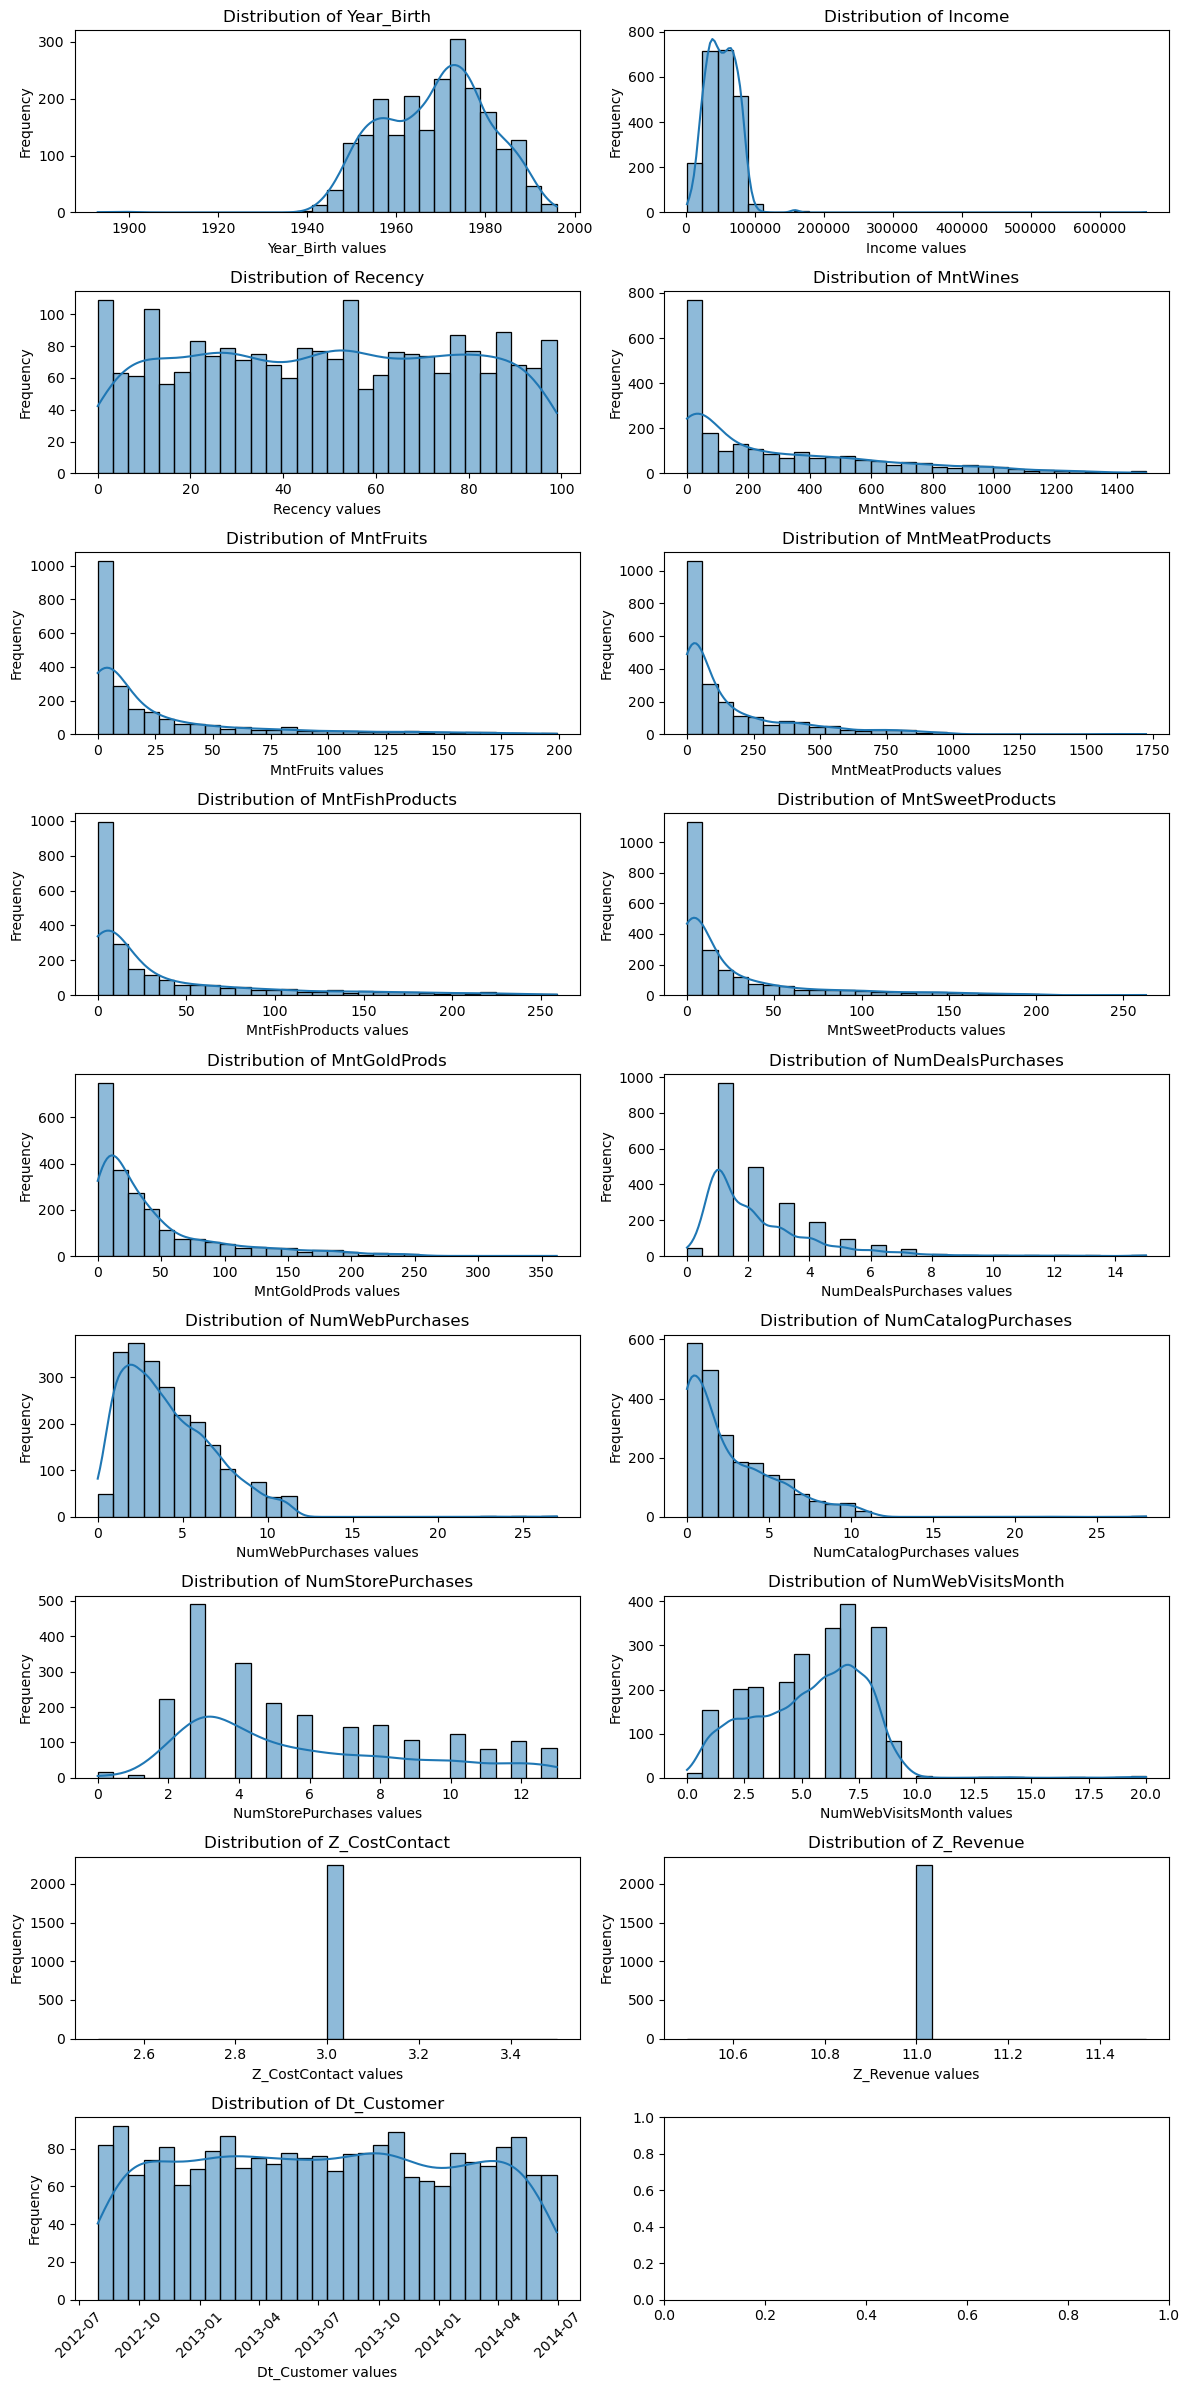

In [15]:
# Histograms
fig, axs = plt.subplots(9, 2, figsize=(12, 24))
axs = axs.flatten()

for i, variable in enumerate(histogram_variables):
    sns.histplot(x=variable, data=data, ax=axs[i], bins=30, kde=True)
    axs[i].set_xlabel(f'{variable} values')
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Distribution of {variable}')
    if variable == 'Dt_Customer':
        axs[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**<span style="color:blue">Insights</span>**:
- `Z_CostContact` and `Z_Revenue` seem to only consist of one unique value. These provide no information and should be deleted.
- In general, the data distributions are not too skewed and seem to have reasonable variance.
- The distributions of `Mnt*` seem to have a lot of 0 values.

## 5. Correlation between variables <a class="anchor" id="chapter5"></a>

In order to explore the correlations of all variables with all other variables all at once, a heatmap can be created. 

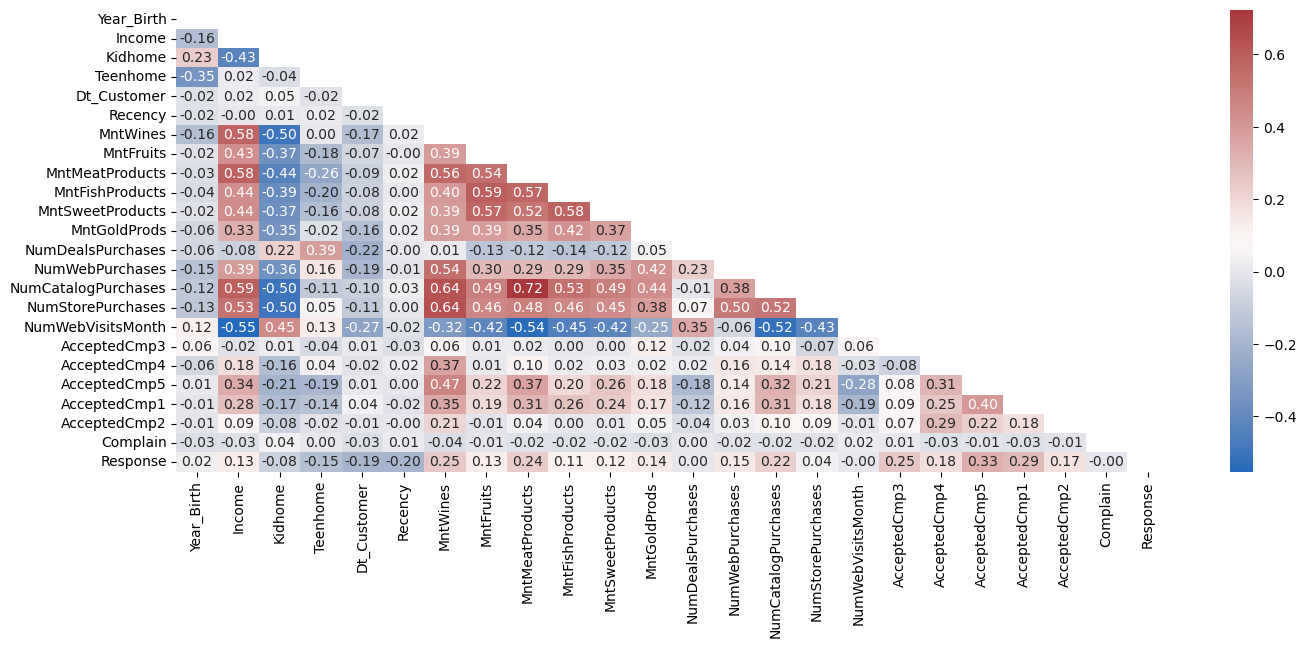

In [25]:
# Dropping the variables that can't be analyzed or aren't useful
correlations = data.drop(['ID', 'Education', 'Marital_Status', 'Z_CostContact', 'Z_Revenue'], axis=1).corr()

# Masking half the heatmap so we don't see duplicate info
matrix = np.triu(correlations)

# Plot
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(correlations, annot=True, fmt='.2f', cmap="vlag", mask=matrix)

**<span style="color:blue">Insights</span>**:
- The `Response` variable is not strongly correlated with any other variable in particular.
- `Response` is most correlated with `AcceptedCmp5` (0.33)
- `Complain`, `NumWebVisitsMonth` and `NumDealsPurchases` appear to be uncorrelated (0.00) with `Response`.
- The strongest correlation (0.72) is between `NumCatalogPurchases` and `MntMeatProducts`.

The correlation of `Response` with `Education` and `Marital_Status` can be checked separately, visually comparing the frequencies.

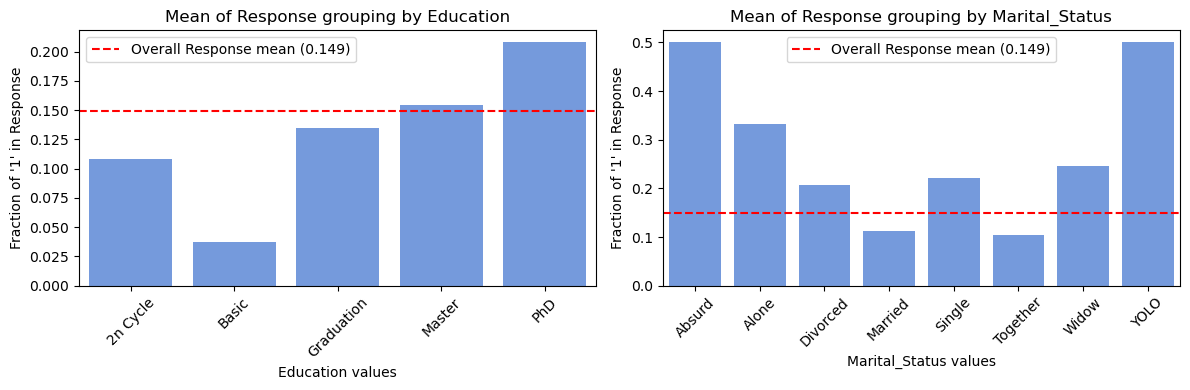

In [17]:
# Overall Response frequency
response_mean = data['Response'].mean()

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
for i, variable in enumerate(['Education', 'Marital_Status']):
    # Calculating frequency of Response given education level
    correlation = pd.DataFrame(data[[variable, 'Response']].groupby(variable)['Response'].mean())

    # Plot
    sns.barplot(x=correlation.index, y=correlation['Response'], color='cornflowerblue', ax=axs[i])
    axs[i].set_title(f'Mean of Response grouping by {variable}')
    axs[i].set_xlabel(f'{variable} values')
    axs[i].set_ylabel("Fraction of '1' in Response")
    axs[i].axhline(y=response_mean, color='red', linestyle='--', label=f'Overall Response mean ({response_mean:.3f})')
    axs[i].legend()
    axs[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**<span style="color:blue">Insights</span>**:
- People with basic education seems much less likely to accept the offer.
- People with PhDs seems more likely to accept the offer.
- People that is alone (alone, single, widow cathegories) are more likely to accept the offer.
- People married and together seem less likely to accept the offer. 

The variables that are the most correlated can be retrieved and plotted together for further inspection.

In [56]:
# Exclude pairs that involve the same variable
correlations_no_self = correlations.mask(np.triu(np.ones(correlations.shape)).astype(bool))

# Stack and get the absolute values
stacked_corr = correlations_no_self.abs().stack()

# Sort
sorted_corr = stacked_corr.sort_values(ascending=False)

# Get the top correlated pairs
top_corr_pairs = sorted_corr.head(8)

# Extract the variable pairs and their correlation values
variable_pairs = top_corr_pairs.index
correlation_values = [correlations_no_self.loc[variable1, variable2] for variable1, variable2 in variable_pairs]

# Create a DataFrame
result_df = pd.DataFrame({
    'Variable1': [pair[0] for pair in variable_pairs],
    'Variable2': [pair[1] for pair in variable_pairs],
    'Correlation': correlation_values
})

result_df

,Variable1,Variable2,Correlation
0,NumCatalogPurchases,MntMeatProducts,0.723827
1,NumStorePurchases,MntWines,0.642100
2,NumCatalogPurchases,MntWines,0.635226
3,MntFishProducts,MntFruits,0.594804
4,NumCatalogPurchases,Income,0.589162
5,MntMeatProducts,Income,0.584633
6,MntSweetProducts,MntFishProducts,0.579870
7,MntWines,Income,0.578650


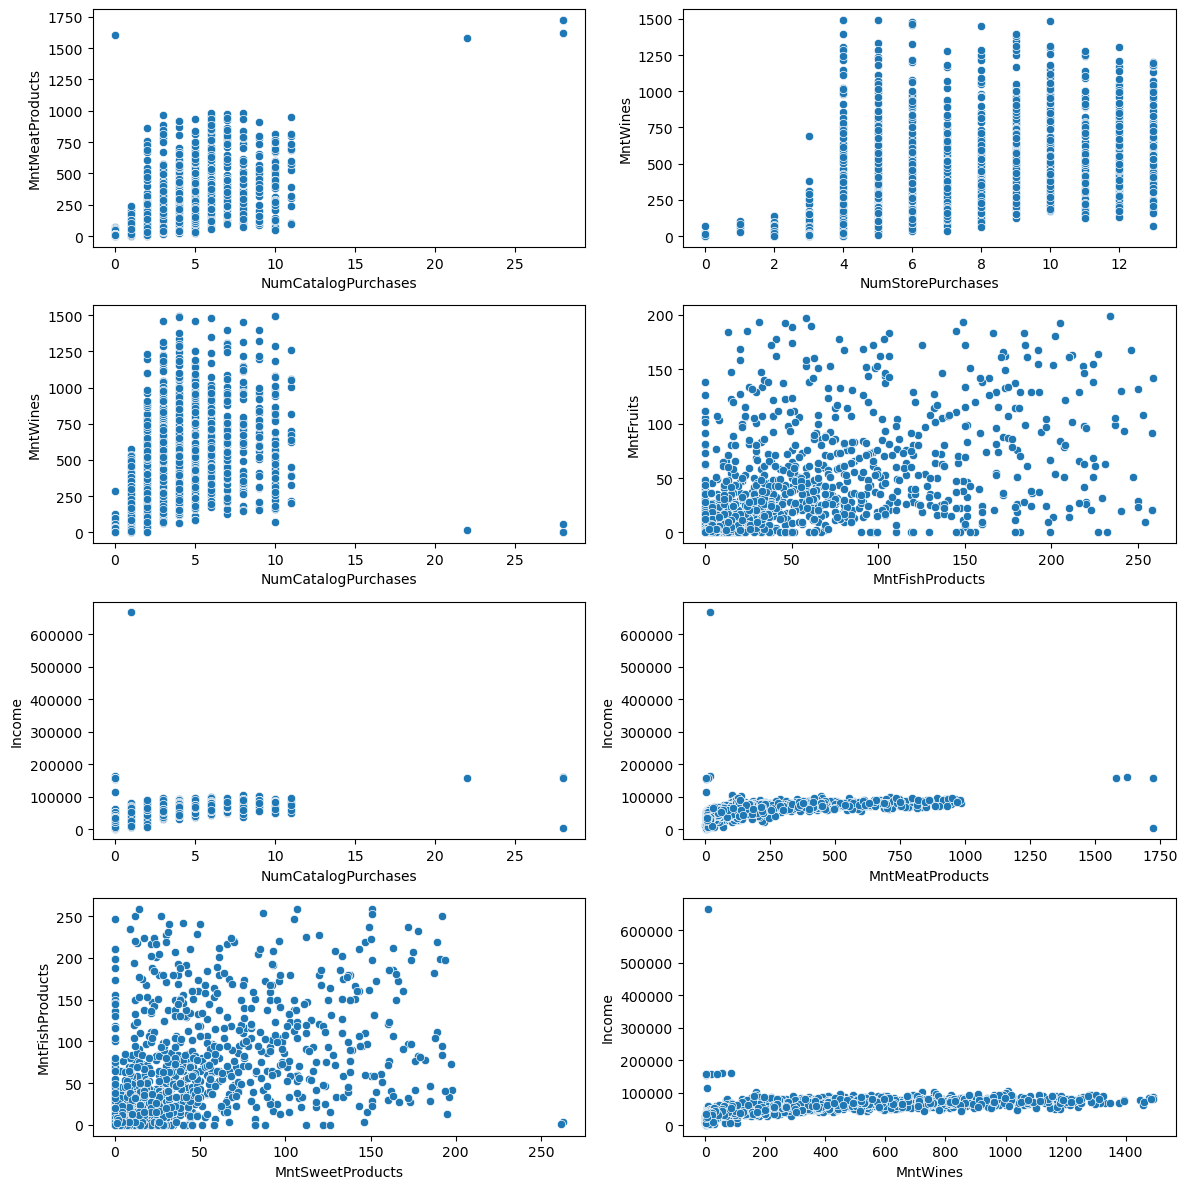

In [75]:
# Histograms
fig, axs = plt.subplots(4, 2, figsize=(12, 12))
axs = axs.flatten()

for i, pair in enumerate(variable_pairs):
    sns.scatterplot(x=data[pair[0]], y=data[pair[1]], ax=axs[i])

plt.tight_layout()
plt.show()

**<span style="color:blue">Insight</span>**: Visually, the correlations between the variables that are most correlated actually seem weak.

The variables that are most correlated with `Response` can also be retrieved.

In [74]:
# Extract correlations with 'Response'
response_correlations = correlations['Response'].drop('Response')

# Get the variables most correlated with 'Response'
most_corr_variables = response_correlations.abs().sort_values(ascending=False).head(6)

# Create a DataFrame
result_df = pd.DataFrame({
    'Variable': most_corr_variables.index,
    'Correlation with Response': most_corr_variables.values
})

result_df

,Variable,Correlation with Response
0,AcceptedCmp5,0.326634
1,AcceptedCmp1,0.293982
2,AcceptedCmp3,0.254258
3,MntWines,0.247254
4,MntMeatProducts,0.236335
5,NumCatalogPurchases,0.220810
